Train on 4320 samples, validate on 1080 samples
Epoch 1/20
4320/4320 [==============================] - 14s 3ms/sample - loss: 1.3073 - accuracy: 0.4549 - val_loss: 0.8035 - val_accuracy: 0.6148
Epoch 2/20
4320/4320 [==============================] - 13s 3ms/sample - loss: 0.4700 - accuracy: 0.7905 - val_loss: 0.2067 - val_accuracy: 0.9102
Epoch 3/20
4320/4320 [==============================] - 13s 3ms/sample - loss: 0.2373 - accuracy: 0.8944 - val_loss: 0.0958 - val_accuracy: 0.9852
Epoch 4/20
4320/4320 [==============================] - 13s 3ms/sample - loss: 0.1363 - accuracy: 0.9461 - val_loss: 0.0309 - val_accuracy: 0.9972
Epoch 5/20
4320/4320 [==============================] - 13s 3ms/sample - loss: 0.1127 - accuracy: 0.9632 - val_loss: 0.1103 - val_accuracy: 0.9602
Epoch 6/20
4320/4320 [==============================] - 13s 3ms/sample - loss: 0.0742 - accuracy: 0.9757 - val_loss: 0.1947 - val_accuracy: 0.9176
Epoch 7/20
4320/4320 [==============================] - 13s 3ms/sample

正解率= 1.0 loss= 8.586535455513648e-05


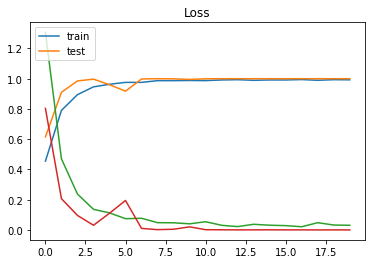

In [7]:
import cnn_model
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

im_rows = 32
im_cols = 32
im_color = 3
in_shape = (im_rows,im_cols,im_color)
nb_classes = 6

photos = np.load('./led.npz',allow_pickle=True)
x = photos['x']
y = photos['y']

x = x.reshape(-1, im_rows, im_cols, im_color)
x = x.astype('float32') / 255
y = keras.utils.to_categorical(y.astype('int32'), nb_classes)

x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.8)

model = cnn_model.get_model(in_shape, nb_classes)

hist = model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=20,
    verbose=1,
    validation_data=(x_test,y_test))

score = model.evaluate(x_test, y_test, verbose=1)
print('正解率=', score[1],'loss=', score[0])

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy')
plt.legend(['train','test'],loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.legend(['train','test'], loc='upper left')
plt.show()

model.save_weights('./phots-model-light.hdf5')
